<a href="https://colab.research.google.com/github/karamm77/AVR-Drivers/blob/main/MNIST_Multi_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The project is designed to classify multi-digit numbers using the MNIST dataset, with the following requirements:



1.   The model takes a single image as input.
2.   It should be able to identify both 2-digit and 3-digit numbers.
1.   Single-digit numbers should be represented as they are (e.g., 4, not 04).



The first goal was to create a customized dataset.
In accordance with the first requirement, all images in the dataset should have a fixed size, regardless of whether they represent single-, double-, or triple-digit numbers.






In this part, I'm simply linking Colab to my Google Drive so I can save the generated dataset to Drive before shutting down Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this part of the code, I'm defining some  functions needed to handle images: centering them, concatenating them, and creating the final image.

In [2]:
import os
import random
import numpy as np
from tqdm import tqdm
from torchvision import datasets
from PIL import Image
import torch


mnist = datasets.MNIST(root='./data', train=True, download=True)
digit_images = {i: [] for i in range(10)}
for img, label in mnist:
    digit_images[label].append(np.array(img))


def center_image_np(img, target_shape):
    h, w = img.shape
    th, tw = target_shape
    pad_h = (th - h) // 2
    pad_w = (tw - w) // 2
    padded = np.zeros((th, tw), dtype=np.uint8) #Here we just create a blank image and filled with zeroes.
    padded[pad_h:pad_h+h, pad_w:pad_w+w] = img #We then Centre the image inside the new blank image with the needed size.
    return padded

#This function is used to combine different numbers in the dataset to create the new one.
def combine_digits_np(digit_arrays):
    return np.concatenate(digit_arrays, axis=1)


def generate_digit_class(label, digits, canvas_shape, num_per_class, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    for i in tqdm(range(num_per_class), desc=f"Generating {digits}-digit: {label}"):
        str_label = str(label)
        digit_array = []
        for d in str_label:
            digit = random.choice(digit_images[int(d)])
            padded_digit = center_image_np(digit, (28, 28))
            digit_array.append(padded_digit) #Here it will have an array of the separated images; each is centerd in size of 28*28.
        full_img = combine_digits_np(digit_array) #Then here it concatenates all images of the separate numbers to a single full image.
        full_img = center_image_np(full_img, canvas_shape) #And here we center the image again to the new size needed for either 2 or 3 images.
        Image.fromarray(full_img).save(os.path.join(save_dir, f"{str_label}_{i}.png"))

base_dir = "multi_digit_mnist_np"



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.06MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.09MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.83MB/s]


Then, we start generating the training dataset of 2-digit and 3-digit numbers by creating 1,000 samples for each label.

In [ ]:
# Two-digit (10–99)
for label in range(10, 100):
    generate_digit_class(label, digits=2, canvas_shape=(28, 28*2), num_per_class=1000,
                         save_dir=os.path.join(base_dir, "2_digits", str(label)))

# Three-digit (100–999)
for label in range(100, 1000):
    generate_digit_class(label, digits=3, canvas_shape=(28, 28*3), num_per_class=1000,
                         save_dir=os.path.join(base_dir, "3_digits", str(label)))

Generating 3-digit: 999: 100%|██████████| 1000/1000 [00:00<00:00, 1900.32it/s]


In [ ]:
# Load MNIST
mnist = datasets.MNIST(root='./data', train=False, download=True)
digit_images = {i: [] for i in range(10)}
for img, label in mnist:
    digit_images[label].append(np.array(img))

After that, in this section we generate validation dataset for both 2-digit and 3-digit number by generating only 100 sample of each label.

In [ ]:
# Two-digit (10–99)
for label in range(10, 100):
    generate_digit_class(label, digits=2, canvas_shape=(28, 28*2), num_per_class=100,
                         save_dir=os.path.join(base_dir, "2_digits_val", str(label)))

# Three-digit (100–999)
for label in range(100, 1000):
    generate_digit_class(label, digits=3, canvas_shape=(28, 28*3), num_per_class=100,
                         save_dir=os.path.join(base_dir, "3_digits_val", str(label)))

Generating 3-digit: 999: 100%|██████████| 100/100 [00:00<00:00, 2325.00it/s]


In this part of the code, I’m handling the case of representing single-digit numbers without leading zeros — for example, showing 4 instead of 04. I’m also creating a new dataset of single-digit numbers, formatted with the same image size as 2-digit numbers. The digits are centered on the canvas purely for visual consistency.

In [ ]:
import cv2

mnist = datasets.MNIST(root='./data', train=True, download=True)
#We here create a dictionary with keys which are the labels from 0 to 9
digit_images = {i: [] for i in range(10)}
for img, label in mnist:
  #We convert the image corresponding to each label to a numpy image and holding it in an array
    digit_images[label].append(np.array(img))
#we here loop over the array and inside the same folder we created 2-digit numbers we create create the folders of single digit numbers double sized in width 28*56
for i in range(0,10):
  images = digit_images[i]
  os.makedirs(f"/content/multi_digit_mnist_np/2_digits/{i}", exist_ok=True)
  target_shape = (28,28*2)
  #For each number category we cnteter the produced image and save it in the directory created
  for k, img in enumerate(images):
    img = center_image_np(img, target_shape)
    cv2.imwrite(f"/content/multi_digit_mnist_np/2_digits/{i}/{i}_{k}.png", img)





We do the same for the validation dataset of the sigle digit numbers

In [ ]:
import cv2
# Load MNIST
mnist = datasets.MNIST(root='./data', train=False, download=True)
digit_images = {i: [] for i in range(10)}
for img, label in mnist:
    digit_images[label].append(np.array(img))

for i in range(0,10):
  images = digit_images[i]
  os.makedirs(f"/content/multi_digit_mnist_np/2_digits_val/{i}", exist_ok=True)
  target_shape = (28,28*2)
  for k, img in enumerate(images):
    img = center_image_np(img, target_shape)
    cv2.imwrite(f"/content/multi_digit_mnist_np/2_digits_val/{i}/{i}_{k}.png", img)





In this block of code, I'm simply redefining the same functions used above for centering images, along with another function that takes the path of a folder containing the images to resize, and the path where the resized images should be saved.

The main goal is to ensure that all datasets created for 1-digit and 2-digit numbers are the same size as the 3-digit number dataset, so that the model can handle a fixed input image size of 28×84.

In [ ]:

import os
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm


def center_image_np(img, target_shape):
    h, w = img.shape[:2]
    th, tw = target_shape

    # Create a blank (black) image
    if len(img.shape) == 2:
        padded = np.zeros((th, tw), dtype=np.uint8)
    else:
        padded = np.zeros((th, tw, img.shape[2]), dtype=np.uint8)

    pad_h = (th - h) // 2
    pad_w = (tw - w) // 2

    padded[pad_h:pad_h + h, pad_w:pad_w + w] = img
    return padded


from pathlib import Path
from tqdm import tqdm
import cv2

def process_dataset(input_dir, output_dir, target_shape=(64, 64), valid_exts={'.jpg', '.png', '.jpeg'}):
    input_dir = Path(input_dir)
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    for class_dir in tqdm(input_dir.iterdir(), desc="Processing classes"):

        output_class_dir = output_dir / class_dir.name
        output_class_dir.mkdir(parents=True, exist_ok=True)

        for img_path in class_dir.glob("*"): #        for img_path in class_dir.glob("*")


            img = cv2.imread(str(img_path), cv2.IMREAD_UNCHANGED)
            centered = center_image_np(img, target_shape)
            cv2.imwrite(str(output_class_dir / img_path.name), centered) #Saves the processed image to the output class directory with the same filename.


    print("✅ All images processed and saved.")

#We start using the function to make 2-digit numbers size as same as 3-digit number size for the training dataset and it moves it to the folder of the 3-digit dataset.
process_dataset("/content/multi_digit_mnist_np/2_digits", "/content/multi_digit_mnist_np/3_digits", target_shape=(28, 28*3))


Processing classes: 100%|██████████| 100/100 [01:11<00:00,  1.40it/s]

✅ All images processed and saved.


We do the same for the validation dataset, and it moves it to the folder of the 3-digit validation dataset.




In [ ]:
process_dataset("/content/multi_digit_mnist_np/2_digits_val", "/content/multi_digit_mnist_np/3_digits_val", target_shape=(28, 28*3))


Processing classes: 100%|██████████| 100/100 [00:04<00:00, 21.12it/s]

✅ All images processed and saved.


Moved the validation data to my google drive so I can keep it after closing colab.\
"Already lost it twice"

In [ ]:
!cp -r /content/multi_digit_mnist_np/3_digits_val /content/drive/MyDrive/Validation_Dataset/

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

##Working with the customized dataset:
We have a root directory for the 3-digit dataset, which contains subfolders named after their labels. Each labeled subfolder contains different variations (combinations) of the same data.

###So we want to recursively loop through the directories to get the path of each labeled image.

In [2]:
from torch.utils.data import Dataset
from PIL import Image
import os
import random

class MultiDigitMNIST(Dataset):
  #Here for the initialization it takes the path of the 3-digit number dataset(which contains the dataset of 1-digit and 2-digit dataset after makeing them with size of 28*84)
    def __init__(self, root_dir, transform=None):
        self.samples = [] #list to store (images pathes,label) tuples
        self.transform = transform

        #Loops over each folder name inside the root directory (3-digits) in which each folder name assumed to be labeled (12,134)
        for label in sorted(os.listdir(root_dir)):
            label_dir = os.path.join(root_dir, label) #Builds the full path and skips if it's not a directory
            if not os.path.isdir(label_dir):
                continue

            all_images = [fname for fname in os.listdir(label_dir) if fname.endswith(".png")]

            for fname in all_images:
              #Here it loops over all images and for each it returns a tuple of the full path of the image and the numeric label
                self.samples.append((os.path.join(label_dir, fname), int(label)))

    def __len__(self):
      #Returns total number of samples
        return len(self.samples)

    def __getitem__(self, idx): #will be called each time we call the data (32,32 lable)
        img_path, label = self.samples[idx]#Each index is a tuple of the path and image label
        img = Image.open(img_path).convert("L")
        if self.transform:
            img = self.transform(img)
        return img, label


At first I tried to work with LeNet Model; but after running it it took much time and the first accuracy appeared wasn't pleasant so I decided to move on with another CNN model which is resnet-18.

Here We apply LeNet model.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.AvgPool2d(2)


        self.fc1 = None
        self.fc2 = None
        self.fc3 = None

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #We add activation function to add nonlinearity to the sysem.
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)

        if self.fc1 is None:
            in_features = x.shape[1]
            # print(in_features)
            self.fc1 = nn.Linear(in_features, 1280).to(x.device) #1520
            self.fc2 = nn.Linear(1280, 1024).to(x.device)
            self.fc3 = nn.Linear(1024, self.num_classes).to(x.device)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
def train_model(train_dir,val_dir, num_classes, image_size=(28, 28), epochs=5, batch_size=64):

    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor()
    ])

    # Load datasets from separate directories
    train_dataset = MultiDigitMNIST(train_dir, transform=transform )
    val_dataset = MultiDigitMNIST(val_dir, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    model = LeNet(num_classes).to("cuda")

    #We define loss which inside applys some certain kind of softmax
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]", leave=False)
        for images, labels in train_bar:
            images = images.to("cuda")
            labels = labels.to("cuda")

            outputs = model(images)
            loss = criterion(outputs, labels)

            #Zero the paramer gradient
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            train_bar.set_postfix({
                "Loss": f"{loss.item():.4f}",
                "Acc": f"{(correct / total):.4f}"
            })

        avg_train_loss = running_loss / total
        train_acc = correct / total
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_acc)


        # Validation Phase

        #To enter validation phase we do model.eval()
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        #We don't need to calculate the gradients since we're not training
        with torch.no_grad():
            val_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} [Val]", leave=False)
            for images, labels in val_bar:
                images = images.to("cuda")
                labels = labels.to("cuda")

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

                val_bar.set_postfix({
                    "Loss": f"{loss.item():.4f}",
                    "Acc": f"{(val_correct / val_total):.4f}"
                })

        avg_val_loss = val_loss / val_total
        val_acc = val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Train Acc={train_acc:.4f} | Val Loss={avg_val_loss:.4f}, Val Acc={val_acc:.4f}")


    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Acc')
    plt.plot(val_accuracies, label='Val Acc')
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


In [ ]:
train_model(train_dir = "./multi_digit_mnist_np/3_digits" ,val_dir ="./multi_digit_mnist_np/3_digits_val" , num_classes=1000, image_size=(28, 28*3),epochs=100,batch_size=4096)


Epoch 1: Train Loss=6.9020, Train Acc=0.0028 | Val Loss=6.8937, Val Acc=0.0047


KeyboardInterrupt: 

In [3]:
import torch.nn as nn
import torchvision.models as models

def get_resnet18_grayscale(num_classes, pretrained=False):
    model = models.resnet18(pretrained=pretrained)

    # We modify first conv layer to accept 1-channel input
    model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

    # Replace classifier head
    model.fc = nn.Linear(model.fc.in_features, num_classes) #Num of Num_Classes is 1000

    return model

model_resnet = get_resnet18_grayscale(num_classes=1000, pretrained=True).to("cuda")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 129MB/s]


As same as LeNet we define training function to run the model with resnet and get an evaluation. And below two graphs representing loss and accuracy for both train and validation.

In [ ]:
def train_resnet(train_dir,val_dir, num_classes, image_size=(28, 28), epochs=5, batch_size=64):


    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),

    ])
    # We Load datasets from separate directories for 3-digits and 3-digits_val
    train_dataset = MultiDigitMNIST(train_dir, transform=transform)
    val_dataset = MultiDigitMNIST(val_dir, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_resnet.parameters(), lr=0.001)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model_resnet.train()
        running_loss = 0.0
        correct = 0
        total = 0

        train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]", leave=False)
        for images, labels in train_bar:
            images = images.to("cuda")
            labels = labels.to("cuda")

            outputs = model_resnet(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            train_bar.set_postfix({
                "Loss": f"{loss.item():.4f}",
                "Acc": f"{(correct / total):.4f}"
            })

        avg_train_loss = running_loss / total
        train_acc = correct / total
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_acc)


        # Validation Phase


        model_resnet.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            val_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} [Val]", leave=False)
            for images, labels in val_bar:
                images = images.to("cuda")
                labels = labels.to("cuda")

                outputs = model_resnet(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

                val_bar.set_postfix({
                    "Loss": f"{loss.item():.4f}",
                    "Acc": f"{(val_correct / val_total):.4f}"
                })

        avg_val_loss = val_loss / val_total
        val_acc = val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Train Acc={train_acc:.4f} | Val Loss={avg_val_loss:.4f}, Val Acc={val_acc:.4f}")

    #The Plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Acc')
    plt.plot(val_accuracies, label='Val Acc')
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


Epoch 1: Train Loss=0.5766, Train Acc=0.8998 | Val Loss=0.1169, Val Acc=0.9765


Epoch 2: Train Loss=0.0113, Train Acc=0.9976 | Val Loss=0.1571, Val Acc=0.9730


Epoch 3: Train Loss=0.0068, Train Acc=0.9986 | Val Loss=0.1359, Val Acc=0.9775


Epoch 4: Train Loss=0.0068, Train Acc=0.9986 | Val Loss=0.2239, Val Acc=0.9650


Epoch 5: Train Loss=0.0039, Train Acc=0.9991 | Val Loss=0.1848, Val Acc=0.9740


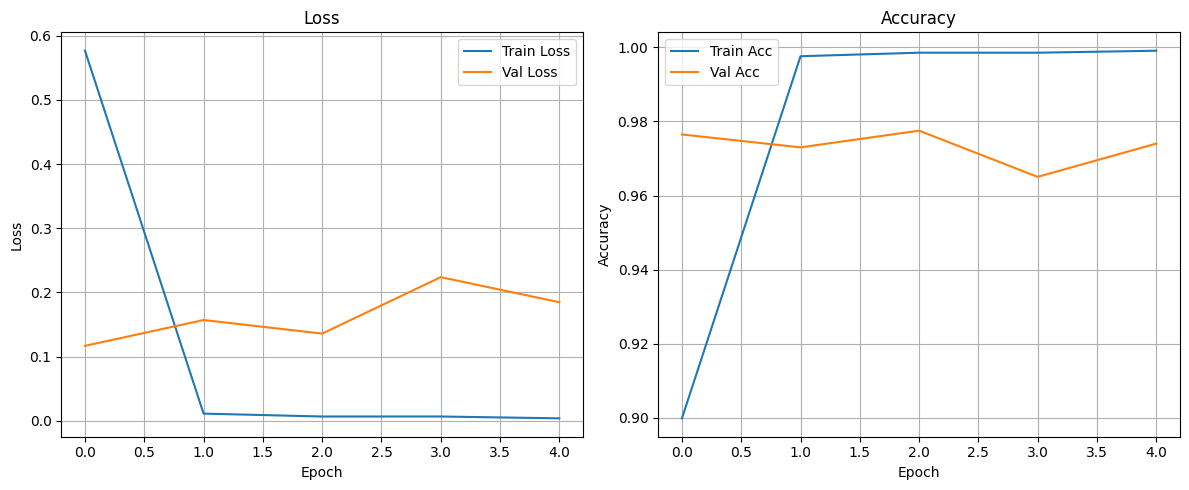

In [ ]:
train_resnet(train_dir = "./multi_digit_mnist_np/3_digits" ,val_dir ="./multi_digit_mnist_np/3_digits_val" , num_classes=1000, image_size=(28, 28*3),epochs=5,batch_size=4096) #to reduce trainig time it takes at each epoch 4096"The max I got with colab GPU"


In [ ]:
torch.save(model_resnet.state_dict(), "/content/drive/MyDrive/Weights/resnet18_mnist_e5.pth")


In [8]:
import torch
from torchvision import transforms
model_resnet.load_state_dict(torch.load("/content/drive/MyDrive/Weights/resnet18_mnist_e5.pth"))


<All keys matched successfully>

In this block we define two needed functions one for the inference and the other to get a classification report to show some metrics.

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  classification_report
from torch.utils.data import DataLoader

#This function is used to get some random samples to test the model on already existing data.
def show_sample_predictions(model, dataset, num_samples=8):
    model.eval()
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    images, labels = zip(*[dataset[i] for i in indices])

    with torch.no_grad():
        inputs = torch.stack(images).to("cuda")
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

    # Plot predictions
    plt.figure(figsize=(15, 4))
    for i in range(num_samples):
        img = images[i].squeeze().numpy()
        true_label = labels[i]
        pred_label = preds[i].item()

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


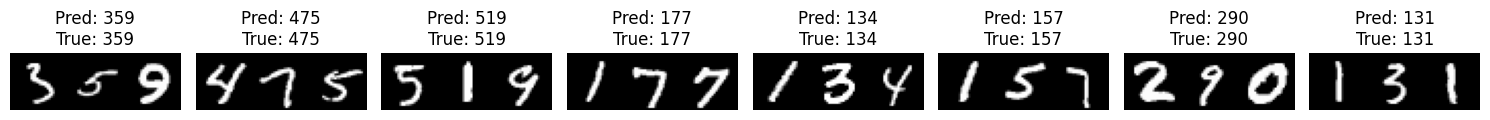

In [11]:
val_dir = "/content/drive/MyDrive/Validation_Dataset/3_digits_val"
image_size = (28, 28*3)
num_classes = 1000


transform = transforms.Compose([
    transforms.Resize(image_size),

    transforms.ToTensor(),

])


val_dataset = MultiDigitMNIST(val_dir, transform=transform)


# Show random predictions from validation set
show_sample_predictions(model_resnet, val_dataset, num_samples=8)


In [12]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

def run_inference_on_folder(model, image_folder, class_names, device="cuda", image_size=(28, 28*3)):
    model.eval()

    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
    ])


    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith((".png", ".jpg", ".jpeg",".webp"))]
    image_paths = [os.path.join(image_folder, f) for f in image_files]

    plt.figure(figsize=(15, 3 * ((len(image_paths) + 3) // 4)))

    for idx, img_path in enumerate(image_paths):
        img = Image.open(img_path).convert("L")
        input_tensor = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(input_tensor)
            probs = F.softmax(outputs, dim=1)
            pred = torch.argmax(probs, dim=1).item()
            confidence = probs[0, pred].item()

        plt.subplot((len(image_paths) + 3) // 4, 4, idx + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"{class_names[pred]} ({confidence:.2f})")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


Testing the model on a hand written paper example: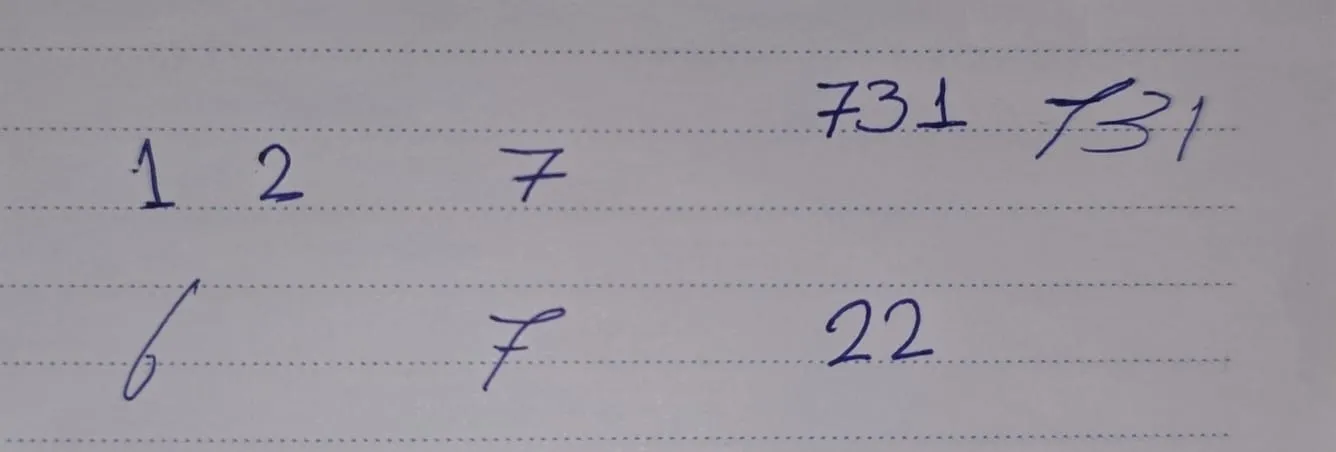

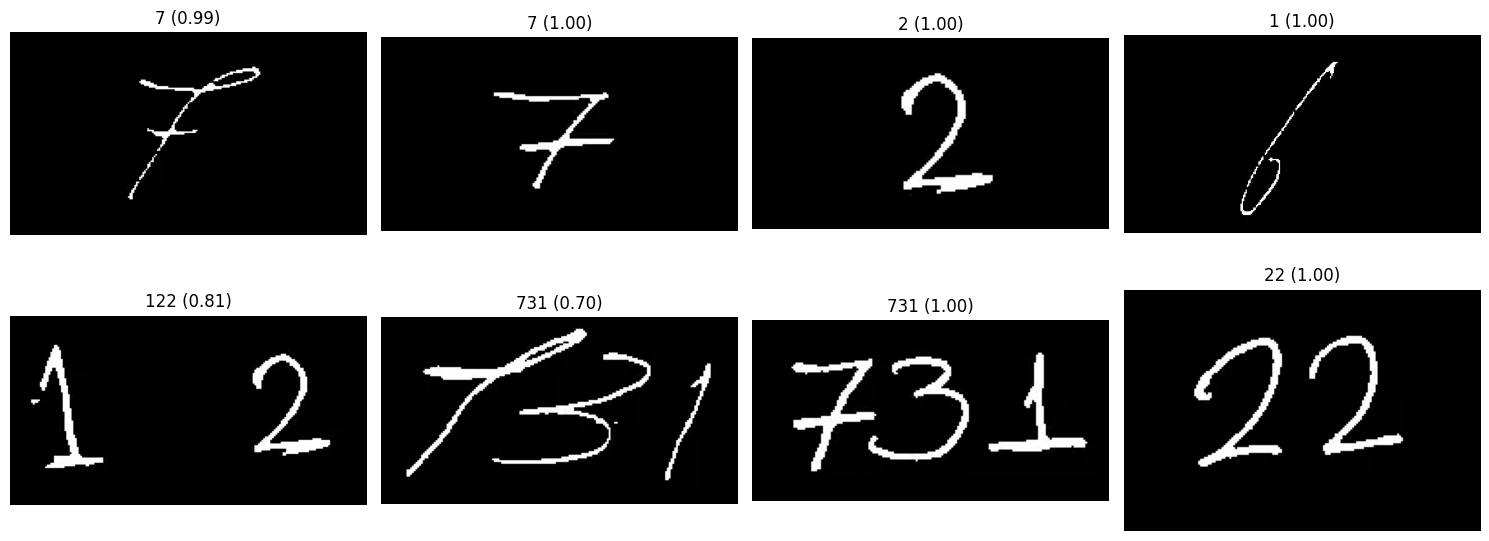

In [13]:
#Defining class name
class_names = [str(i) for i in range(1000)]

# Run inference
run_inference_on_folder(
    model=model_resnet,
    image_folder="/content/drive/MyDrive/Testing_Data",
    class_names=class_names
)